In [1]:
import numpy as np
import utils as ut
from matplotlib import pyplot as plt

## Calculate nGal of Euclid widefield at TIM redshifts. 

Ndz taken from Pozetti 2016 https://arxiv.org/pdf/1603.01453 table 3
These values are given in units of 1/(sqDeg * dz)

Assuming  0.5 × 10−16 erg cm−2 s−1 for deep field (Private correspondence Kevin McCarthy and Dipa)
and 3 × 10−16 erg cm−2 s−1 for wide field (figure 1 caption in Pozetti 2016)

[1212.75  1261.92  1582.548 1148.688]


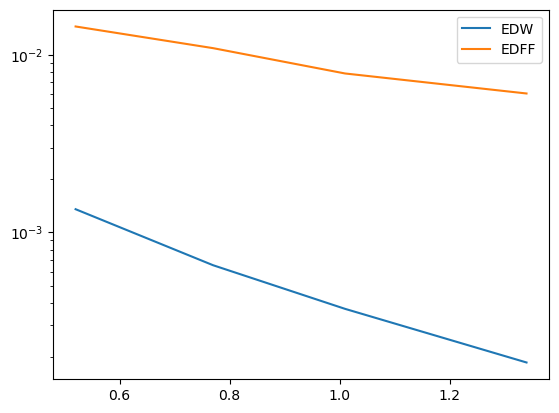

In [51]:
#               Bin1  Bin2  Bin3  Bin4
#                 z ~  .6       .9     1.2  1.45
Ndzs_Wide =  np.array([2273,   1579,  1136, 652]) * 1/u.deg**2
Ndzs_Deep =  np.array([24255, 26290, 23978, 21272]) * 1/u.deg**2
zMins =      np.array([0.52,   0.77,  1.01, 1.34])
zMaxs =      np.array([0.77,   1.01,  1.34, 1.61])

dOmegaDeg = (0.2 *u.deg**2)#assumed TIM on-sky area in sqDeg
dOmegaSR = (0.2 *u.deg**2).to(u.sr).value #assumed TIM on-sky area in Steradian

NsWide = dOmegaDeg * Ndzs_Wide * (zMaxs - zMins) 
NsDeep = dOmegaDeg * Ndzs_Deep * (zMaxs - zMins) 

print(NsDeep)

VBins = ut.volume_cube(zMins, zMaxs, dOmegaSR, lilh = True) #NOTE: VOLUMES ARE IN LITTLE h UNITS!!!

nGalsWide = NsWide/VBins
nGalsDeep = NsDeep/VBins

plt.semilogy(zMins, nGalsWide, label = 'EDW')
plt.semilogy(zMins, nGalsDeep, label = 'EDFF')

plt.legend()

In [53]:
nGalsWide

<Quantity [0.00134863, 0.00065275, 0.00037088, 0.00018515] sr / Mpc3>

In [54]:
nGalsDeep

<Quantity [0.01439111, 0.01086816, 0.00782842, 0.00604052] sr / Mpc3>

In [6]:
from astropy import constants as const, units as u
TwoTeraE = const.h * 80e9 * u.Hz

In [7]:
TwoTeraE.to(u.eV)

<Quantity 0.00033085 eV>

In [13]:
(0.001*u.Gpc**3).to(u.Mpc**3)

<Quantity 1000000. Mpc3>

In [23]:
nGalsWide.to(u.sr/u.Gpc**3)

<Quantity [410.81596793, 198.83942045, 112.97802507,  56.39855825] sr / Gpc3>